Obtain the USGS Landslide Inventory and Susceptibility Map from: https://www.usgs.gov/tools/us-landslide-inventory-and-susceptibility-map

Create a directory 'Data' in your projects root folder and place the downloaded files inside it.

# Inspect the Layers in the GDB Dataset 

In [5]:
import fiona
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

gdb_dir = "../Data/USGS/US_Landslide_2/US_Landslide_2.gdb"
layers = fiona.listlayers(gdb_dir)
print("Layers in USGS Landslide geodatabase:")
for lyr in layers:
    print("  -", lyr)


Layers in USGS Landslide geodatabase:
  - US_Landslide_point_v2
  - US_Landslide_poly_v2


In [6]:
for lyr in layers:
    df = gpd.read_file(gdb_dir, layer=lyr)
    print(f"{lyr:35s} {len(df):6d} data points")


US_Landslide_point_v2               176427 data points


/opt/anaconda3/envs/nlp/lib/python3.13/site-packages/pyogrio/raw.py:198: UserWarning: Measured (M) geometry types are not supported. Original type 'Measured 3D MultiPolygon' is converted to 'MultiPolygon Z'
  return ogr_read(
/opt/anaconda3/envs/nlp/lib/python3.13/site-packages/pyogrio/raw.py:198: RuntimeWarning: organizePolygons() received an unexpected geometry.  Either a polygon with interior rings, or a polygon with less than 4 points, or a non-Polygon geometry.  Return arguments as a collection.
  return ogr_read(


US_Landslide_poly_v2                454105 data points


## Plotting Landslide Points

In [7]:
landslide_df_points = gpd.read_file(gdb_dir, layer="US_Landslide_point_v2")


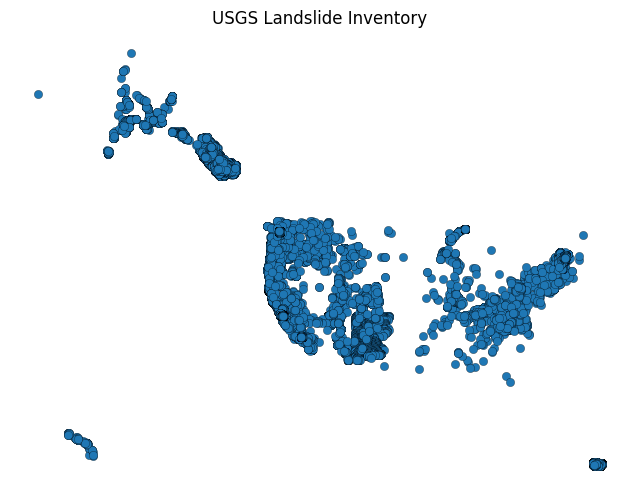

In [8]:
landslide_df_points.plot(figsize=(8, 6), edgecolor="k", linewidth=0.2)
plt.title("USGS Landslide Inventory")
plt.axis("off")
plt.show()

## Plotting Landslide Polygons

In [9]:
landslide_df_poly = gpd.read_file(gdb_dir, layer="US_Landslide_poly_v2")

/opt/anaconda3/envs/nlp/lib/python3.13/site-packages/pyogrio/raw.py:198: UserWarning: Measured (M) geometry types are not supported. Original type 'Measured 3D MultiPolygon' is converted to 'MultiPolygon Z'
  return ogr_read(
/opt/anaconda3/envs/nlp/lib/python3.13/site-packages/pyogrio/raw.py:198: RuntimeWarning: organizePolygons() received an unexpected geometry.  Either a polygon with interior rings, or a polygon with less than 4 points, or a non-Polygon geometry.  Return arguments as a collection.
  return ogr_read(


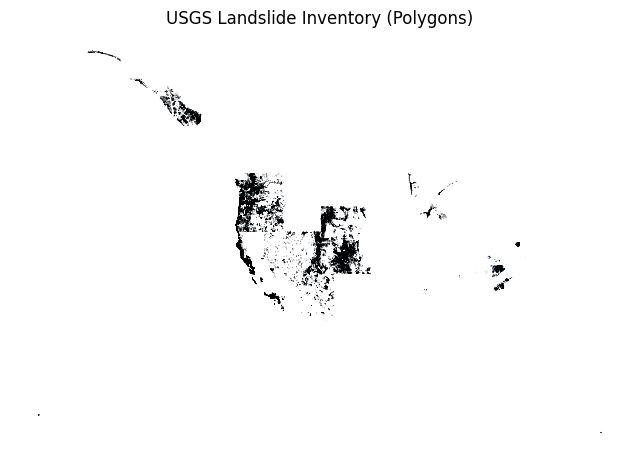

In [10]:
landslide_df_poly.plot(figsize=(8, 6), edgecolor="k", linewidth=0.2)
plt.title("USGS Landslide Inventory (Polygons)")
plt.axis("off")
plt.show()

In [11]:
print(landslide_df_points.shape)
print(landslide_df_points.dtypes)

(176427, 8)
Date              object
Fatalities       float64
Confidence         int16
Inventory         object
InventoryURL      object
Info_source       object
Notes             object
geometry        geometry
dtype: object


In [12]:
print(landslide_df_poly.shape)
print(landslide_df_poly.dtypes)

(454105, 11)
Date                object
Fatalities         float64
Confidence           int16
Classification      object
Inventory           object
InventoryURL        object
Info_source         object
Notes               object
Shape_Length       float64
Shape_Area         float64
geometry          geometry
dtype: object


In [13]:
print(landslide_df_poly.geometry.area)

/var/folders/4l/861pz_dj397_gz1sywdvrptw0000gq/T/ipykernel_14825/3481693440.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print(landslide_df_poly.geometry.area)


0         0.000018
1         0.000044
2         0.000092
3         0.001233
4         0.000558
            ...   
454100    0.000086
454101    0.000152
454102    0.000013
454103    0.000002
454104    0.000005
Length: 454105, dtype: float64


In [14]:
landslide_df_points.head(10)

,Date,Fatalities,Confidence,Inventory,InventoryURL,Info_source,Notes,geometry
0,9/26/2007,NaN,5,AK DOT,https://www.arcgis.com/home/item.html?id=7d34a...,None,Routine-Minor Rockfall. This database contains...,POINT (-146.32276 64.281)
1,4/29/2015,NaN,5,AK DOT,https://www.arcgis.com/home/item.html?id=7d34a...,None,Catastrophic Rockfall. This database contains ...,POINT (-152.517 57.73585)
2,8/16/2011,NaN,5,AK DOT,https://www.arcgis.com/home/item.html?id=7d34a...,None,Routine-Minor Rockfall. This database contains...,POINT (-148.32139 61.7955)
3,5/13/2007,NaN,5,AK DOT,https://www.arcgis.com/home/item.html?id=7d34a...,None,Routine-Minor Rockfall. This database contains...,POINT (-148.45418 61.78442)
4,10/16/2013,NaN,5,AK DOT,https://www.arcgis.com/home/item.html?id=7d34a...,None,Routine-Minor Rockfall. This database contains...,POINT (-149.35243 60.35591)
5,3/13/2005,NaN,5,AK DOT,https://www.arcgis.com/home/item.html?id=7d34a...,None,Catastrophic Rockfall. This database contains ...,POINT (-152.57907 57.69971)
6,6/4/2015,NaN,5,AK DOT,https://www.arcgis.com/home/item.html?id=7d34a...,None,Routine-Minor Rockfall. This database contains...,POINT (-148.33154 61.79451)
7,4/26/2011,NaN,5,AK DOT,https://www.arcgis.com/home/item.html?id=7d34a...,None,Routine-Minor Rockfall. This database contains...,POINT (-147.79886 61.79815)
8,9/14/2007,NaN,5,AK DOT,https://www.arcgis.com/home/item.html?id=7d34a...,None,Routine-Minor Rockfall. This database contains...,POINT (-148.38623 61.79109)
9,10/28/2011,NaN,5,AK DOT,https://www.arcgis.com/home/item.html?id=7d34a...,None,Routine-Minor Rockfall. This database contains...,POINT (-148.4336 61.78975)


In [15]:
landslide_df_poly.head(10)

,Date,Fatalities,Confidence,Classification,Inventory,InventoryURL,Info_source,Notes,Shape_Length,Shape_Area,geometry
0,5/1/95-6/27/95,NaN,8,Landslide,USGS AK Glacier Bay,https://doi.org/10.5066/F7C827F8,None,Landsat 5. Image Year: 1995. Image Band: False...,0.018406,0.000018,"MULTIPOLYGON Z (((-137.35212 58.79105 0, -137...."
1,7/4/86-7/20/86,NaN,8,Landslide,USGS AK Glacier Bay,https://doi.org/10.5066/F7C827F8,None,Landsat 5. Image Year: 1986. Image Band: False...,0.027335,0.000044,"MULTIPOLYGON Z (((-137.35215 58.79772 0, -137...."
2,6/12/13-7/14/13,NaN,8,Landslide,USGS AK Glacier Bay,https://doi.org/10.5066/F7C827F8,None,Landsat 8. Image Year: 2013. Image Band: False...,0.044266,0.000092,"MULTIPOLYGON Z (((-137.34856 58.7999 0, -137.3..."
3,6/1/12-6/24/12,NaN,8,Landslide,USGS AK Glacier Bay,https://doi.org/10.5066/F7C827F8,None,Landsat 7. Image Year: 2012. Image Band: False...,0.334954,0.001233,"MULTIPOLYGON Z (((-137.44296 58.79375 0, -137...."
4,8/2/14-5/1/15,NaN,8,Landslide,USGS AK Glacier Bay,https://doi.org/10.5066/F7C827F8,None,Landsat 8. Image Year: 2015. Image Band: False...,0.155086,0.000558,"MULTIPOLYGON Z (((-137.28928 58.74718 0, -137...."
5,2/7/14-2/23/14,NaN,8,Landslide,USGS AK Glacier Bay,https://doi.org/10.5066/F7C827F8,None,Landsat 8. Image Year: 2014. Image Band: False...,0.222905,0.000841,"MULTIPOLYGON Z (((-136.98263 58.53687 0, -136...."
6,Pre 9/7/84,NaN,8,Landslide,USGS AK Glacier Bay,https://doi.org/10.5066/F7C827F8,None,Landsat 5. Image Year: 1984. Image Band: Band ...,0.068019,0.000258,"MULTIPOLYGON Z (((-137.51093 58.82295 0, -137...."
7,10/12/85-6/25/86,NaN,8,Landslide,USGS AK Glacier Bay,https://doi.org/10.5066/F7C827F8,None,Landsat 5. Image Year: 1986. Image Band: False...,0.066262,0.000222,"MULTIPOLYGON Z (((-137.49318 58.82467 0, -137...."
8,5/24/15-7/4/15,NaN,8,Landslide,USGS AK Glacier Bay,https://doi.org/10.5066/F7C827F8,None,Landsat 8. Image Year: 2015. Image Band: False...,0.106004,0.000197,"MULTIPOLYGON Z (((-137.27068 58.62696 0, -137...."
9,6/9/06-7/2/06,NaN,8,Landslide,USGS AK Glacier Bay,https://doi.org/10.5066/F7C827F8,None,Landsat 5. Image Year: 2006. Image Band: False...,0.082630,0.000108,"MULTIPOLYGON Z (((-137.00406 58.96789 0, -137...."


In [16]:
landslide_df_poly.tail(10)

,Date,Fatalities,Confidence,Classification,Inventory,InventoryURL,Info_source,Notes,Shape_Length,Shape_Area,geometry
454095,None,NaN,5,Landslide,WY WSGS,https://www.wsgs.wyo.gov/hazards/landslides,None,"multiple slump, multiple flow. Deep Seated. Me...",0.004546,1.520908e-06,"MULTIPOLYGON Z (((-107.60555 42.27648 0, -107...."
454096,None,NaN,5,Evidence of landsliding,WY WSGS,https://www.wsgs.wyo.gov/hazards/landslides,None,"Quaternary alluvium, multiple debris flow. Mee...",0.019316,1.446424e-05,"MULTIPOLYGON Z (((-107.62557 42.27275 0, -107...."
454097,None,NaN,5,Landslide,WY WSGS,https://www.wsgs.wyo.gov/hazards/landslides,None,"multiple slump, multiple flow. Deep Seated. Me...",0.003240,6.120609e-07,"MULTIPOLYGON Z (((-107.62292 42.26951 0, -107...."
454098,None,NaN,5,Landslide,WY WSGS,https://www.wsgs.wyo.gov/hazards/landslides,None,"multiple slump, multiple flow. Deep Seated. Me...",0.006060,1.657131e-06,"MULTIPOLYGON Z (((-107.61001 42.25973 0, -107...."
454099,None,NaN,5,Landslide,WY WSGS,https://www.wsgs.wyo.gov/hazards/landslides,None,"multiple slump, multiple flow. Deep Seated. Me...",0.003743,9.585263e-07,"MULTIPOLYGON Z (((-107.60884 42.25809 0, -107...."
454100,None,NaN,5,Landslide,WY WSGS,https://www.wsgs.wyo.gov/hazards/landslides,None,"multiple block slide, multiple flow. Deep Seat...",0.063354,8.647272e-05,"MULTIPOLYGON Z (((-107.73867 42.38345 0, -107...."
454101,None,NaN,5,Evidence of landsliding,WY WSGS,https://www.wsgs.wyo.gov/hazards/landslides,None,"multiple slump, multiple flow, creep, slope wa...",0.066905,1.517643e-04,"MULTIPOLYGON Z (((-107.71356 42.374 0, -107.71..."
454102,None,NaN,5,Landslide,WY WSGS,https://www.wsgs.wyo.gov/hazards/landslides,None,"block slide, multiple flow. Deep Seated. Meeks...",0.025322,1.267155e-05,"MULTIPOLYGON Z (((-110.02586 43.00021 0, -110...."
454103,None,NaN,5,Landslide,WY WSGS,https://www.wsgs.wyo.gov/hazards/landslides,None,"block slide, multiple flow. Deep Seated. Meeks...",0.006052,2.175997e-06,"MULTIPOLYGON Z (((-110.01853 42.99449 0, -110...."
454104,None,NaN,5,Landslide,WY WSGS,https://www.wsgs.wyo.gov/hazards/landslides,None,multiple slump. Deep Seated. Meeks Cabin Reser...,0.014619,5.072241e-06,"MULTIPOLYGON Z (((-110.62598 41.10212 0, -110...."


# Inspect Oregon Subset of the large USGS Landslide Points Dataset

In [17]:
df = landslide_df_points.copy()

mask = (
    df['Inventory'].str.startswith('OR', na=False) 
    # df['Inventory'].str.contains('DOGAMI', na=False)
)

df_or_dogami = df[mask].copy()

print(f"Number of records for OR or DOGAMI: {len(df_or_dogami)}")

Number of records for OR or DOGAMI: 14985


In [18]:
df_or_dogami.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 14985 entries, 68626 to 83610
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Date          6879 non-null   object  
 1   Fatalities    1 non-null      float64 
 2   Confidence    14985 non-null  int16   
 3   Inventory     14985 non-null  object  
 4   InventoryURL  14985 non-null  object  
 5   Info_source   13304 non-null  object  
 6   Notes         14985 non-null  object  
 7   geometry      14985 non-null  geometry
dtypes: float64(1), geometry(1), int16(1), object(5)
memory usage: 965.8+ KB


<Axes: >

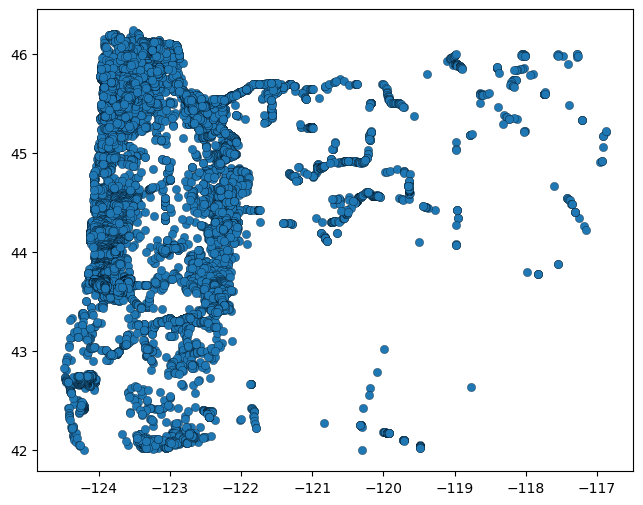

In [19]:
df_or_dogami.plot(figsize=(8, 6), edgecolor="k", linewidth=0.2)

In [20]:
df_or_dogami.head(10)

,Date,Fatalities,Confidence,Inventory,InventoryURL,Info_source,Notes,geometry
68626,None,NaN,8,OR DOGAMI,https://www.oregongeology.org/slido/data.htm,Oregon Department of Transportation,Rockfall. Hwy Name:Columbia River; Hwy Number:...,POINT (-120.60523 45.74026)
68627,None,NaN,8,OR DOGAMI,https://www.oregongeology.org/slido/data.htm,Oregon Department of Transportation,Debris Flow. Hwy Name:Columbia River; Hwy Numb...,POINT (-120.54609 45.71838)
68628,None,NaN,8,OR DOGAMI,https://www.oregongeology.org/slido/data.htm,Oregon Department of Transportation,Rockfall. Hwy Name:Columbia River; Hwy Number:...,POINT (-120.48199 45.68723)
68629,None,NaN,8,OR DOGAMI,https://www.oregongeology.org/slido/data.htm,Oregon Department of Transportation,Debris Flow. Hwy Name:Columbia River; Hwy Numb...,POINT (-120.40456 45.69256)
68630,None,NaN,8,OR DOGAMI,https://www.oregongeology.org/slido/data.htm,Oregon Department of Transportation,Rockfall. Hwy Name:Columbia River; Hwy Number:...,POINT (-120.38183 45.6935)
68631,None,NaN,8,OR DOGAMI,https://www.oregongeology.org/slido/data.htm,Oregon Department of Transportation,Rockfall. Hwy Name:Columbia River; Hwy Number:...,POINT (-120.37745 45.69419)
68632,None,NaN,8,OR DOGAMI,https://www.oregongeology.org/slido/data.htm,Oregon Department of Transportation,Rockfall. Hwy Name:Columbia River; Hwy Number:...,POINT (-120.36691 45.69678)
68633,None,NaN,8,OR DOGAMI,https://www.oregongeology.org/slido/data.htm,Oregon Department of Transportation,Rockfall. Hwy Name:Columbia River; Hwy Number:...,POINT (-120.36462 45.6976)
68634,None,NaN,8,OR DOGAMI,https://www.oregongeology.org/slido/data.htm,Oregon Department of Transportation,Rockfall. Hwy Name:Columbia River; Hwy Number:...,POINT (-119.11279 45.92371)
68635,None,NaN,8,OR DOGAMI,https://www.oregongeology.org/slido/data.htm,Oregon Department of Transportation,Rockfall. Hwy Name:Columbia River; Hwy Number:...,POINT (-119.06186 45.94944)


In [21]:
df_or_dogami["Inventory"].unique()

array(['OR DOGAMI'], dtype=object)

In [22]:
df_or_dogami.tail(5)

,Date,Fatalities,Confidence,Inventory,InventoryURL,Info_source,Notes,geometry
83606,12/20/2014,NaN,3,OR DOGAMI,https://www.oregongeology.org/slido/data.htm,News/trip check,"Street Map. Road closed, retaining wall of lan...",POINT (-124.11735 44.14759)
83607,12/20/2014,NaN,3,OR DOGAMI,https://www.oregongeology.org/slido/data.htm,trip check,Street Map. Dataset also includes information ...,POINT (-123.64091 45.49094)
83608,12/20/2014,NaN,3,OR DOGAMI,https://www.oregongeology.org/slido/data.htm,news,Street Map. closed road. Dataset also includes...,POINT (-124.05742 44.6259)
83609,10/2014,NaN,3,OR DOGAMI,https://www.oregongeology.org/slido/data.htm,news,closed road. Dataset also includes information...,POINT (-123.57851 45.26648)
83610,12/2014,NaN,3,OR DOGAMI,https://www.oregongeology.org/slido/data.htm,news,closed road. Dataset also includes information...,POINT (-123.03183 43.26002)


In [23]:
percent_filled = df_or_dogami.notnull().mean() * 100
print(percent_filled)

Date             45.905906
Fatalities        0.006673
Confidence      100.000000
Inventory       100.000000
InventoryURL    100.000000
Info_source      88.782115
Notes           100.000000
geometry        100.000000
dtype: float64


In [24]:
confidence_counts = df_or_dogami['Confidence'].value_counts()
print(confidence_counts)

Confidence
8    7115
3    5871
5    1999
Name: count, dtype: int64


/var/folders/4l/861pz_dj397_gz1sywdvrptw0000gq/T/ipykernel_14825/708118977.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=confidence_counts.index, y=confidence_counts.values, palette="viridis")


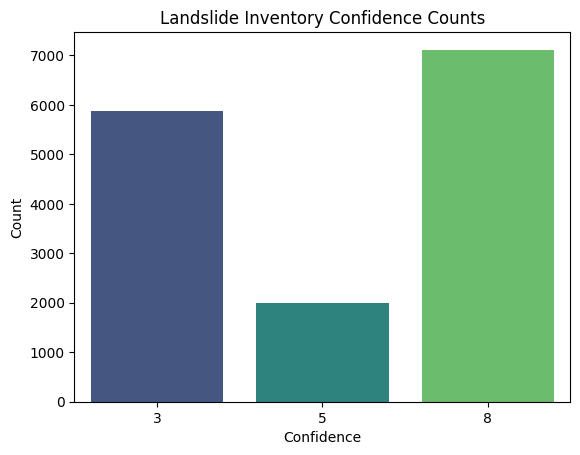

In [25]:
sns.barplot(x=confidence_counts.index, y=confidence_counts.values, palette="viridis")
plt.xlabel('Confidence')
plt.ylabel('Count')
plt.title('Landslide Inventory Confidence Counts')
plt.show()

# Inspect USGS Landslide Polygon Dataset

In [26]:
landslide_df_poly = gpd.read_file(gdb_dir, layer="US_Landslide_poly_v2")

/opt/anaconda3/envs/nlp/lib/python3.13/site-packages/pyogrio/raw.py:198: UserWarning: Measured (M) geometry types are not supported. Original type 'Measured 3D MultiPolygon' is converted to 'MultiPolygon Z'
  return ogr_read(
/opt/anaconda3/envs/nlp/lib/python3.13/site-packages/pyogrio/raw.py:198: RuntimeWarning: organizePolygons() received an unexpected geometry.  Either a polygon with interior rings, or a polygon with less than 4 points, or a non-Polygon geometry.  Return arguments as a collection.
  return ogr_read(


In [27]:
df = landslide_df_poly.copy()

mask = (
    df['Inventory'].str.startswith('OR', na=False) 
    # df['Inventory'].str.contains('DOGAMI', na=False)
)

df_or_dogami = df[mask].copy()

print(f"Number of records for OR or DOGAMI: {len(df_or_dogami)}")

Number of records for OR or DOGAMI: 84462


In [28]:
df_or_dogami.head(10)

,Date,Fatalities,Confidence,Classification,Inventory,InventoryURL,Info_source,Notes,Shape_Length,Shape_Area,geometry
196657,None,NaN,8,Landslide,OR DOGAMI,https://www.oregongeology.org/slido/data.htm,OR DOGAMI Deposits,Landslide. Slide. Complex-Earth Slide-Rotation...,0.043836,5.991489e-05,"MULTIPOLYGON Z (((-122.62628 45.31763 0, -122...."
196658,None,NaN,5,Evidence of landsliding,OR DOGAMI,https://www.oregongeology.org/slido/data.htm,OR DOGAMI Deposits,Fan. Flow. Debris Flow. Historic (<150yrs). Th...,0.003174,1.901651e-07,"MULTIPOLYGON Z (((-122.62457 45.30632 0, -122...."
196659,None,NaN,5,Evidence of landsliding,OR DOGAMI,https://www.oregongeology.org/slido/data.htm,OR DOGAMI Deposits,Fan. Flow. Debris Flow. Historic (<150yrs). Th...,0.001725,8.824556e-08,"MULTIPOLYGON Z (((-122.51418 45.32638 0, -122...."
196660,None,NaN,5,Evidence of landsliding,OR DOGAMI,https://www.oregongeology.org/slido/data.htm,OR DOGAMI Deposits,Fan. Flow. Debris Flow. Historic (<150yrs). Th...,0.001660,1.221220e-07,"MULTIPOLYGON Z (((-122.51563 45.32752 0, -122...."
196661,None,NaN,5,Evidence of landsliding,OR DOGAMI,https://www.oregongeology.org/slido/data.htm,OR DOGAMI Deposits,Fan. Flow. Debris Flow. Historic (<150yrs). Th...,0.001165,3.202464e-08,"MULTIPOLYGON Z (((-122.5076 45.32636 0, -122.5..."
196662,None,NaN,5,Evidence of landsliding,OR DOGAMI,https://www.oregongeology.org/slido/data.htm,OR DOGAMI Deposits,Fan. Flow. Debris Flow. Historic (<150yrs). Th...,0.000624,1.536281e-08,"MULTIPOLYGON Z (((-122.50651 45.32555 0, -122...."
196663,None,NaN,5,Evidence of landsliding,OR DOGAMI,https://www.oregongeology.org/slido/data.htm,OR DOGAMI Deposits,Fan. Flow. Debris Flow. Historic (<150yrs). Th...,0.001151,4.765098e-08,"MULTIPOLYGON Z (((-122.50579 45.32524 0, -122...."
196664,None,NaN,5,Evidence of landsliding,OR DOGAMI,https://www.oregongeology.org/slido/data.htm,OR DOGAMI Deposits,Fan. Flow. Debris Flow. Historic (<150yrs). Th...,0.003908,3.997667e-07,"MULTIPOLYGON Z (((-122.50226 45.32329 0, -122...."
196665,None,NaN,5,Evidence of landsliding,OR DOGAMI,https://www.oregongeology.org/slido/data.htm,OR DOGAMI Deposits,Fan. Flow. Debris Flow. Historic (<150yrs). Th...,0.002106,1.655126e-07,"MULTIPOLYGON Z (((-122.50458 45.32596 0, -122...."
196666,None,NaN,5,Evidence of landsliding,OR DOGAMI,https://www.oregongeology.org/slido/data.htm,OR DOGAMI Deposits,Fan. Flow. Debris Flow. Historic (<150yrs). Th...,0.001795,1.011855e-07,"MULTIPOLYGON Z (((-122.50248 45.32871 0, -122...."


In [29]:
landslide_df_poly["Inventory"].unique()

array(['USGS AK Glacier Bay', 'USGS AK St Elias', 'USDA-FS AK Tongass',
       'AZ GS', 'Santa Catalina Island CA (Regmi et al., 2019)',
       'USGS CA LA County Jan 2019', 'USGS CA Montecito Jan 2018',
       'CA GS', 'CO GS', 'Western CO (Regmi et al., 2010)', 'KY GS',
       'USGS MN LIDAR', 'NC GS', 'NV NBMG',
       'East OK, West AR (Regmi & Walter, 2020)',
       'USGS OR Coast Nov 1996', 'OR DOGAMI', 'USGS PA (Pomeroy, 1974)',
       'USGS CA Crow Creek 1998', 'USGS CA Walpert Ridge 1998',
       'USGS CO Front Range July 1999', 'USGS WA Puget Sound', 'NASA',
       'USGS Seismic Ground Failure', 'UT GRC', 'WA WGS', 'WA SDIC',
       'West Coast Slow Moving (Yuankun et al., 2021)', 'WY WSGS'],
      dtype=object)

In [30]:
df = landslide_df_poly.copy()

mask = (
    df['Inventory'].str.contains('CA', na=False) 
    # df['Inventory'].str.contains('DOGAMI', na=False)
)

df_ca = df[mask].copy()

print(f"Number of records for CA: {len(df_ca)}")

Number of records for CA: 107927


In [31]:
df_ca.head(10)

,Date,Fatalities,Confidence,Classification,Inventory,InventoryURL,Info_source,Notes,Shape_Length,Shape_Area,geometry
24284,None,NaN,8,Landslide,"Santa Catalina Island CA (Regmi et al., 2019)",https://doi.org/10.1002/esp.4686,None,Landslide inventory used in Regmi et al. (2019...,0.001444,8.331029e-08,"MULTIPOLYGON Z (((-118.44775 33.36294 0, -118...."
24285,None,NaN,8,Landslide,"Santa Catalina Island CA (Regmi et al., 2019)",https://doi.org/10.1002/esp.4686,None,Landslide inventory used in Regmi et al. (2019...,0.001833,1.345659e-07,"MULTIPOLYGON Z (((-118.44197 33.36157 0, -118...."
24286,None,NaN,8,Landslide,"Santa Catalina Island CA (Regmi et al., 2019)",https://doi.org/10.1002/esp.4686,None,Landslide inventory used in Regmi et al. (2019...,0.001447,1.007826e-07,"MULTIPOLYGON Z (((-118.40155 33.37054 0, -118...."
24287,None,NaN,8,Landslide,"Santa Catalina Island CA (Regmi et al., 2019)",https://doi.org/10.1002/esp.4686,None,Landslide inventory used in Regmi et al. (2019...,0.001448,1.124918e-07,"MULTIPOLYGON Z (((-118.42303 33.38077 0, -118...."
24288,None,NaN,8,Landslide,"Santa Catalina Island CA (Regmi et al., 2019)",https://doi.org/10.1002/esp.4686,None,Landslide inventory used in Regmi et al. (2019...,0.001322,6.250247e-08,"MULTIPOLYGON Z (((-118.42323 33.38113 0, -118...."
24289,None,NaN,8,Landslide,"Santa Catalina Island CA (Regmi et al., 2019)",https://doi.org/10.1002/esp.4686,None,Landslide inventory used in Regmi et al. (2019...,0.000912,4.353893e-08,"MULTIPOLYGON Z (((-118.39658 33.36723 0, -118...."
24290,None,NaN,8,Landslide,"Santa Catalina Island CA (Regmi et al., 2019)",https://doi.org/10.1002/esp.4686,None,Landslide inventory used in Regmi et al. (2019...,0.000962,3.153527e-08,"MULTIPOLYGON Z (((-118.39578 33.36708 0, -118...."
24291,None,NaN,8,Landslide,"Santa Catalina Island CA (Regmi et al., 2019)",https://doi.org/10.1002/esp.4686,None,Landslide inventory used in Regmi et al. (2019...,0.001019,4.505894e-08,"MULTIPOLYGON Z (((-118.39593 33.36714 0, -118...."
24292,None,NaN,8,Landslide,"Santa Catalina Island CA (Regmi et al., 2019)",https://doi.org/10.1002/esp.4686,None,Landslide inventory used in Regmi et al. (2019...,0.000555,1.606895e-08,"MULTIPOLYGON Z (((-118.41177 33.37696 0, -118...."
24293,None,NaN,8,Landslide,"Santa Catalina Island CA (Regmi et al., 2019)",https://doi.org/10.1002/esp.4686,None,Landslide inventory used in Regmi et al. (2019...,0.000819,4.666593e-08,"MULTIPOLYGON Z (((-118.41127 33.37717 0, -118...."


In [32]:
df_ca["Inventory"].unique()

array(['Santa Catalina Island CA (Regmi et al., 2019)',
       'USGS CA LA County Jan 2019', 'USGS CA Montecito Jan 2018',
       'CA GS', 'USGS CA Crow Creek 1998', 'USGS CA Walpert Ridge 1998'],
      dtype=object)